# K Means Clustering

This notebooks serves as a simulation notebook for k means clustering intuition.

# GENERAL SETTINGS --------------------------------------

## Initial Timestamp

In [1]:
import time
print("Date and Time of Starting Execution: " + time.strftime("%d/%m/%Y") + " " +time.strftime("%X"))

global_start_time = time.time()

Date and Time of Starting Execution: 09/01/2022 14:23:27


## Libraries

In [2]:
#general libraries
from typing import Optional
from numpy import array, random, concatenate, argmin
from typing import List, Tuple, Optional, Any
from scipy.spatial.distance import cdist

In [3]:
#personal libraries
import Code.Visualization as V

## Notebook Settings

In [4]:
SEED_FOR_DATA = 9847
N_FOR_SIMULATION = 10
SEED_FOR_K_MEANS = 44

# ANALYSIS ---------------------------------------------------------

## Data

In this part, the function for data generation is created.

> **HINT:** We are generating random data. For preserving the reproducibility principle, use predefined seeds.

### Function

In [5]:
def generate_data(n_of_obs_in_class: int, seed: Optional[int] = None) -> array:
    """
    Generates data for simulation. Three clusters generated out of normal distribution with
    n_of_obs_in_class observation in each.
    :param n_of_obs_in_class: int. Number of observation in each class.
    :param seed: Optional[int]. If int, then used as a seed in random generation.
    :return: np.array. Data.
    """
    if seed is not None:
        random.seed(seed)
    x = concatenate((
        random.normal(0, 1, n_of_obs_in_class),
        random.normal(5, 1, n_of_obs_in_class),
        random.normal(-5, 1, n_of_obs_in_class)
    ))
    y = concatenate((
        random.normal(0, 1, n_of_obs_in_class),
        random.normal(5, 1, n_of_obs_in_class),
        random.normal(-5, 1, n_of_obs_in_class)
    ))
    X = array([x, y]).transpose()

    return X

### Generating and Plotting Data Without Seed

In [6]:
#setting seed and number of observations.
data_seed = None
n = 10

[[-0.71324642  0.62960609]
 [-0.15414314  1.54898135]
 [ 0.46367659 -0.37197479]
 [-0.53555721 -0.87379716]
 [ 0.13561109  1.3631932 ]]


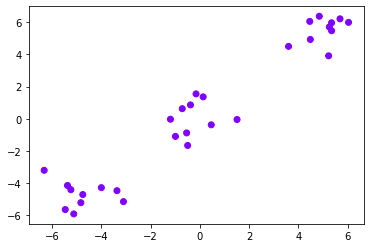

In [7]:
X = generate_data(n_of_obs_in_class=n, seed=data_seed)
print(X[0:5,:])
visu = V.Visualizer()
visu.plot_clusters(X[:,0], X[:,1], [1]*X.shape[0])

### Generating and Plotting Data With Seed

In [8]:
#setting seed and number of observations.
data_seed = SEED_FOR_DATA
n = N_FOR_SIMULATION

[[-0.04161352 -1.02425981]
 [-0.32633457  1.70647315]
 [ 0.95369705 -0.57299167]
 [-0.49045302 -0.64630489]
 [-0.48923121 -2.73032412]]


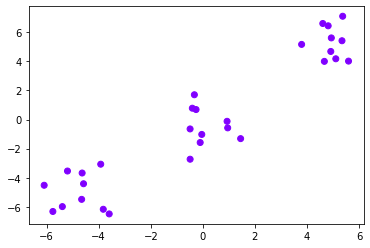

In [9]:
X = generate_data(n_of_obs_in_class=n, seed=data_seed)
print(X[0:5,:])
visu = V.Visualizer()
visu.plot_clusters(X[:,0], X[:,1], [1]*X.shape[0])

## Clustering Simulation

### Class

In [10]:
class KMeans:
    """
    Class for naive k means implementation.
    """

    def __init__(self, k: int) -> None:
        self._k = k
        self._X = array
        self._seed: Optional[int] = None
        self._centroids: array
        self._labels: array
        self._visu = V.Visualizer()

    def initialize(self, X: array, seed: Optional[int] = None) -> None:
        """
        Initialize the clustering. Randomly chooses the centroids.
        :param X: array. 2D array.
        :param seed: Optional[int]. If int, it is used as seed for centroids choice.
        """
        self._seed = seed
        self._X = X
        self._labels = [0] * self._X.shape[0]
        if self._seed is not None:
            random.seed(self._seed)
        centroids_idxs = random.choice(self._X.shape[0], self._k, replace=False)
        self._centroids = self._X[centroids_idxs, :]

    def perform_e_step(self) -> None:
        """
        Performs E (Expectation) step in clustering.
        """
        dists = cdist(self._X, self._centroids, "euclidean")
        self._labels = array([argmin(i) for i in dists])

    def perform_m_step(self) -> None:
        """
        Performs M (Maximization) step in clustering.
        """
        new_centroids = []
        for i in range(self._k):
            temp_cent = self._X[self._labels == i].mean(axis=0)
            new_centroids.append(temp_cent)
        self._centroids = array(new_centroids)

    def plot(self, title: str = "Title") -> None:
        """
        Plots the current situation in clustering.
        :param title: str. Title of the plot.
        """
        self._visu.plot_clusters_and_centroid(
            self._X[:, 0], self._X[:, 1],
            self._labels,
            self._centroids[:, 0], self._centroids[:, 1],
            title
        )


### Simulation Without Seed

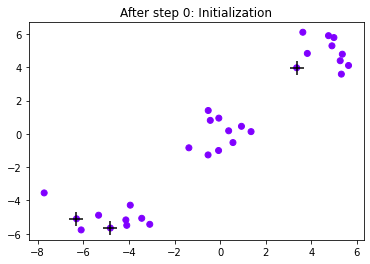

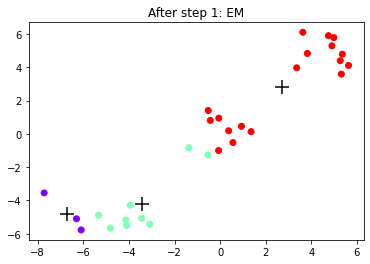

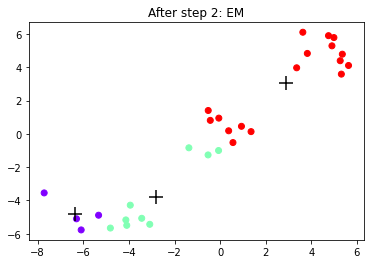

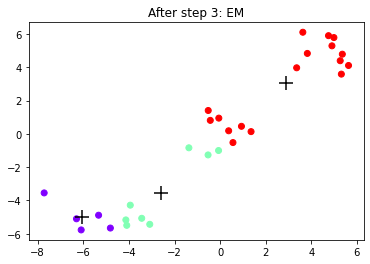

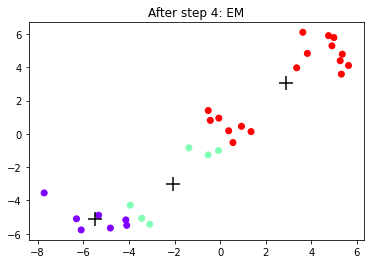

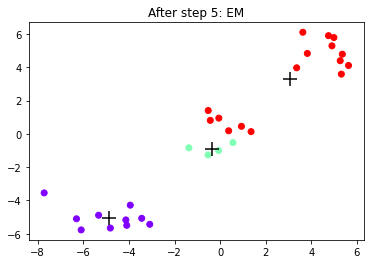

In [11]:
# parameters setting
n = N_FOR_SIMULATION
data_seed = None # set to None to get random results

k = 3
k_means_seed = None # set to None to get random results

# generating data
X = generate_data(n_of_obs_in_class=n, seed=data_seed)

# performing k means
k_means = KMeans(k)
k_means.initialize(X, k_means_seed)
k_means.plot("After step 0: Initialization")

for i in range(1, 6, 1):
    k_means.perform_e_step()
    k_means.perform_m_step()
    k_means.plot(f"After step {i}: EM")

### Simulation With Seed

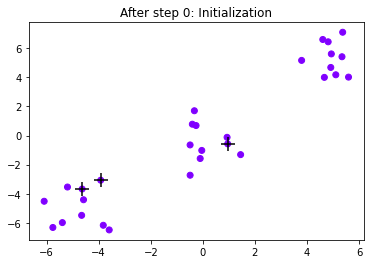

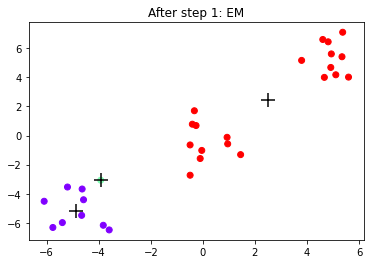

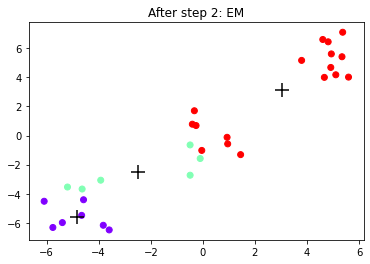

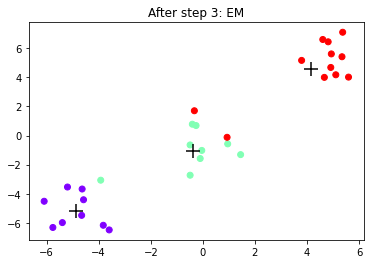

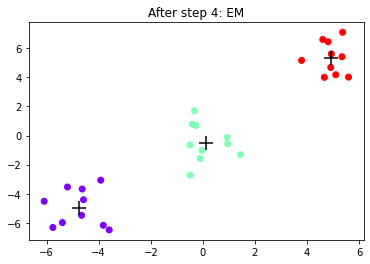

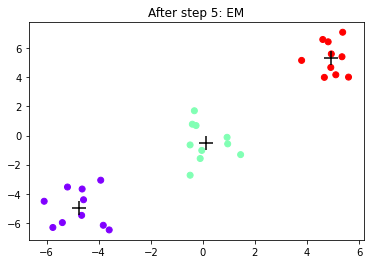

In [12]:
# parameters setting
n = N_FOR_SIMULATION
data_seed = SEED_FOR_DATA

k = 3
k_means_seed = SEED_FOR_K_MEANS

# generating data
X = generate_data(n_of_obs_in_class=n, seed=data_seed)

# performing k means
k_means = KMeans(k)
k_means.initialize(X, k_means_seed)
k_means.plot("After step 0: Initialization")

for i in range(1, 6, 1):
    k_means.perform_e_step()
    k_means.perform_m_step()
    k_means.plot(f"After step {i}: EM")

## Final Timestamp

In [13]:
print("Date and Time of Ending Execution: " + time.strftime("%d/%m/%Y") + " " +time.strftime("%X"))
print("Time duration of whole notebook is: " + str(round((time.time() - global_start_time)/60, 3)) + " seconds")

Date and Time of Ending Execution: 09/01/2022 14:23:29
Time duration of whole notebook is: 0.028 seconds
